# Advanced Data Manipulation using Pandas

In [1]:
# Import the necessary packages
import pandas as pd

## SECTION 1: Joining Dataframes

### Why do we want to do this

There are many occasions when we have related data spread across multiple files. The data can be related to each other in different ways. How they are related and how completely we can join the data from the datasets will vary.

In this section, we will consider different scenarios and show how we might join the data. We will use csv files and in all cases the first step will be to read the datasets into a pandas Dataframe from where we will do the joining.

First, let’s download the data files contained in the folder `Data Manipulation & Cleaning`. If you’re using Jupyter, make sure to place these files in a seperate folder named `data` within the same directory where your notebook file is.

### Scenario 1 - Two data sets containing the same columns but different rows of data

Here we want to add the rows from one Dataframe to the rows of the other
Dataframe. In order to do this we can use the `pd.concat()` function.

In [56]:
df_SN7577i_a = pd.read_csv(".\data\SN7577i_a.csv")
df_SN7577i_b = pd.read_csv(".\data\SN7577i_b.csv")

Have a quick look at what these Dataframes look like with

In [57]:
df_SN7577i_a

,Id,Q1,Q2,Q3,Q4
0,1,1,-1,1,8
1,2,3,-1,1,4
2,3,10,3,2,6
3,4,9,-1,10,10
4,5,10,2,6,1
5,6,1,-1,1,1
6,7,1,-1,1,8
7,8,1,-1,1,1
8,9,9,-1,10,10
9,10,2,-1,1,1


In [58]:
df_SN7577i_b

,Id,Q1,Q2,Q3,Q4
0,1277,10,10,4,6
1,1278,2,-1,5,4
2,1279,2,-1,4,5
3,1280,1,-1,2,3
4,1281,10,2,3,4
5,1282,2,-1,3,6
6,1283,10,10,2,10
7,1284,9,-1,8,9
8,1285,11,11,1,2
9,1286,10,6,6,6


The `concat()` function appends the rows from the two Dataframes to
create the df_all_rows Dataframe. When you list this out you can see
that all of the data rows are there, however, there is a problem with
the `index`.

In [59]:
df_all_rows = pd.concat([df_SN7577i_a, df_SN7577i_b])
df_all_rows

,Id,Q1,Q2,Q3,Q4
0,1,1,-1,1,8
1,2,3,-1,1,4
2,3,10,3,2,6
3,4,9,-1,10,10
4,5,10,2,6,1
5,6,1,-1,1,1
6,7,1,-1,1,8
7,8,1,-1,1,1
8,9,9,-1,10,10
9,10,2,-1,1,1


We didn’t explicitly set an index for any of the Dataframes we have used. For `df_SN7577i_a` and `df_SN7577i_b` default indexes would have been created by pandas. When we concatenated the Dataframes the indexes
were also concatenated resulting in duplicate entries.

This is really only a problem if you need to access a row by its index. We can fix the problem with the following code.

In [60]:
df_all_rows = df_all_rows.reset_index(drop=True)
df_all_rows

,Id,Q1,Q2,Q3,Q4
0,1,1,-1,1,8
1,2,3,-1,1,4
2,3,10,3,2,6
3,4,9,-1,10,10
4,5,10,2,6,1
5,6,1,-1,1,1
6,7,1,-1,1,8
7,8,1,-1,1,1
8,9,9,-1,10,10
9,10,2,-1,1,1


In [61]:
# or, alternatively, there's the `ignore_index` option in the `pd.concat()` function:
df_all_rows = pd.concat([df_SN7577i_a, df_SN7577i_b], ignore_index=True)
df_all_rows

,Id,Q1,Q2,Q3,Q4
0,1,1,-1,1,8
1,2,3,-1,1,4
2,3,10,3,2,6
3,4,9,-1,10,10
4,5,10,2,6,1
5,6,1,-1,1,1
6,7,1,-1,1,8
7,8,1,-1,1,1
8,9,9,-1,10,10
9,10,2,-1,1,1


What if the columns in the Dataframes are not the same?

In [62]:
df_SN7577i_aa = pd.read_csv(".\data\SN7577i_aa.csv")
df_SN7577i_bb = pd.read_csv(".\data\SN7577i_bb.csv")

In [63]:
df_SN7577i_aa

,Id,Q1,Q2,Q3
0,1,1,-1,1
1,2,3,-1,1
2,3,10,3,2
3,4,9,-1,10
4,5,10,2,6
5,6,1,-1,1
6,7,1,-1,1
7,8,1,-1,1
8,9,9,-1,10
9,10,2,-1,1


In [64]:
df_SN7577i_bb

,Id,Q1,Q2,Q4
0,1277,10,10,6
1,1278,2,-1,4
2,1279,2,-1,5
3,1280,1,-1,3
4,1281,10,2,4
5,1282,2,-1,6
6,1283,10,10,10
7,1284,9,-1,9
8,1285,11,11,2
9,1286,10,6,6


In [65]:
df_all_rows = pd.concat([df_SN7577i_aa, df_SN7577i_bb])
df_all_rows

,Id,Q1,Q2,Q3,Q4
0,1,1,-1,1.0,NaN
1,2,3,-1,1.0,NaN
2,3,10,3,2.0,NaN
3,4,9,-1,10.0,NaN
4,5,10,2,6.0,NaN
5,6,1,-1,1.0,NaN
6,7,1,-1,1.0,NaN
7,8,1,-1,1.0,NaN
8,9,9,-1,10.0,NaN
9,10,2,-1,1.0,NaN


In this case `df_SN7577i_aa` has no Q4 column and `df_SN7577i_bb` has no `Q3` column. When they are concatenated, the resulting Dataframe has a column for `Q3` and `Q4`. For the rows corresponding to `df_SN7577i_aa` the values in the `Q4` column are missing and denoted by `NaN`. The same applies to `Q3` for the `df_SN7577i_bb` rows.

### Scenario 2 - Adding the columns from one Dataframe to those of another Dataframe

In [66]:
df_SN7577i_c = pd.read_csv(".\data\SN7577i_c.csv")
df_SN7577i_d = pd.read_csv(".\data\SN7577i_d.csv")

In [67]:
df_SN7577i_c

,Id,maritl,numhhd
0,1,6,3
1,2,4,3
2,3,6,2
3,4,4,1
4,5,4,1
5,6,2,2
6,7,2,2
7,8,2,2
8,9,6,2
9,10,6,1


In [68]:
df_SN7577i_d

,Id,Q1,Q2
0,1,1,-1
1,2,3,-1
2,3,10,3
3,4,9,-1
4,5,10,2
5,6,1,-1
6,7,1,-1
7,8,1,-1
8,9,9,-1
9,10,2,-1


In [69]:
df_all_cols = pd.concat([df_SN7577i_c, df_SN7577i_d], axis = 1)
df_all_cols

,Id,maritl,numhhd,Id,Q1,Q2
0,1,6,3,1,1,-1
1,2,4,3,2,3,-1
2,3,6,2,3,10,3
3,4,4,1,4,9,-1
4,5,4,1,5,10,2
5,6,2,2,6,1,-1
6,7,2,2,7,1,-1
7,8,2,2,8,1,-1
8,9,6,2,9,9,-1
9,10,6,1,10,2,-1


We use the `axis=1` parameter to indicate that it is the columns that need to be joined together. Notice that the `Id` column appears twice, because it was a column in each dataset. This is not particularly desirable, but also not necessarily a problem. However, there are better ways of combining columns from two Dataframes which avoid this problem.

### Scenario 3 - Using merge to join columns

We can join columns from two Dataframes using the `merge()` function. This is similar to the SQL ‘join’ functionality.

You specify the type of join you want using the `how` parameter. The default is the `inner` join which returns the columns from both tables where the `key` or common column values match in both Dataframes.

The possible values of the `how` parameter are shown in the picture below (taken from the Pandas documentation)

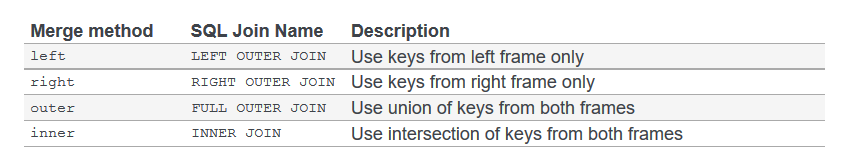

The different join types behave in the same way as they do in SQL. In Python/pandas, any missing values are shown as `NaN`

In order to `merge` the Dataframes, we need to identify a column common to both of them.

In [29]:
df_cd = pd.merge(df_SN7577i_c, df_SN7577i_d, how = 'inner')
df_cd

,Id,maritl,numhhd,Q1,Q2
0,1,6,3,1,-1
1,2,4,3,3,-1
2,3,6,2,10,3
3,4,4,1,9,-1
4,5,4,1,10,2
5,6,2,2,1,-1
6,7,2,2,1,-1
7,8,2,2,1,-1
8,9,6,2,9,-1
9,10,6,1,2,-1


In fact, if there is only one column with the same name in each Dataframe, it will be assumed to be the one you want to join on. In this example the `Id` column

Leaving the join column to default in this way is not best practice. It is better to explicitly name the column using the `on` parameter.

In [71]:
df_cd = pd.merge(df_SN7577i_c, df_SN7577i_d, how = 'inner', on = 'Id')
df_cd

,Id,maritl,numhhd,Q1,Q2
0,1,6,3,1,-1
1,2,4,3,3,-1
2,3,6,2,10,3
3,4,4,1,9,-1
4,5,4,1,10,2
5,6,2,2,1,-1
6,7,2,2,1,-1
7,8,2,2,1,-1
8,9,6,2,9,-1
9,10,6,1,2,-1


In many circumstances, the column names that you wish to join on are not the same in both Dataframes, in which case you can use the `left_on` and `right_on` parameters to specify them separately.

In [72]:
df_cd = pd.merge(df_SN7577i_c, df_SN7577i_d, how='inner', left_on = 'Id', right_on = 'Id')
df_cd

,Id,maritl,numhhd,Q1,Q2
0,1,6,3,1,-1
1,2,4,3,3,-1
2,3,6,2,10,3
3,4,4,1,9,-1
4,5,4,1,10,2
5,6,2,2,1,-1
6,7,2,2,1,-1
7,8,2,2,1,-1
8,9,6,2,9,-1
9,10,6,1,2,-1


### Practice with data

> 1.  Examine the contents of the `SN7577i_aa` and `SN7577i_bb` csv
>     files using Excel or equivalent.
> 2.  Using the `SN7577i_aa` and `SN7577i_bb` csv files, create a
>     Dataframe which is the result of an outer join using the `Id`
>     column to join on.
> 3.  What do you notice about the column names in the new Dataframe?
> 4.  Using `shift`+`tab` in Jupyter examine the possible parameters for
>     the `merge()` function.
> 5.  re-write the code so that the columns names which are common to
>     both files have suffixes indicating the filename from which they
>     come
> 6.  If you add the parameter `indicator=True`, what additional
>     information is provided in the resulting Dataframe?

### Solution

> 1.  Examine the contents of the `SN7577i_aa` and `SN7577i_bb` csv
>     files using Excel or equivalent.

In [73]:
# Loading the datasets from the csv files
df_SN7577i_aa = pd.read_csv(".\data\SN7577i_aa.csv")
df_SN7577i_bb = pd.read_csv(".\data\SN7577i_bb.csv")

In [74]:
# Check the 1st dataframe
df_SN7577i_aa

,Id,Q1,Q2,Q3
0,1,1,-1,1
1,2,3,-1,1
2,3,10,3,2
3,4,9,-1,10
4,5,10,2,6
5,6,1,-1,1
6,7,1,-1,1
7,8,1,-1,1
8,9,9,-1,10
9,10,2,-1,1


In [75]:
# Check the 2nd dataframe
df_SN7577i_bb

,Id,Q1,Q2,Q4
0,1277,10,10,6
1,1278,2,-1,4
2,1279,2,-1,5
3,1280,1,-1,3
4,1281,10,2,4
5,1282,2,-1,6
6,1283,10,10,10
7,1284,9,-1,9
8,1285,11,11,2
9,1286,10,6,6


> 2.  Using the `SN7577i_aa` and `SN7577i_bb` csv files, create a
>     Dataframe which is the result of an outer join using the `Id`
>     column to join on.

In [76]:
df_aabb = pd.merge(df_SN7577i_aa, df_SN7577i_bb, how = 'outer', on = 'Id')
df_aabb

,Id,Q1_x,Q2_x,Q3,Q1_y,Q2_y,Q4
0,1,1.0,-1.0,1.0,NaN,NaN,NaN
1,2,3.0,-1.0,1.0,NaN,NaN,NaN
2,3,10.0,3.0,2.0,NaN,NaN,NaN
3,4,9.0,-1.0,10.0,NaN,NaN,NaN
4,5,10.0,2.0,6.0,NaN,NaN,NaN
5,6,1.0,-1.0,1.0,NaN,NaN,NaN
6,7,1.0,-1.0,1.0,NaN,NaN,NaN
7,8,1.0,-1.0,1.0,NaN,NaN,NaN
8,9,9.0,-1.0,10.0,NaN,NaN,NaN
9,10,2.0,-1.0,1.0,NaN,NaN,NaN


> 5.  re-write the code so that the columns names which are common to
>     both files have suffixes indicating the filename from which they
>     come

In [77]:
df_aabb = pd.merge(df_SN7577i_aa, df_SN7577i_bb, how = 'outer', on = 'Id', suffixes = ('_aa', '_bb'))
df_aabb

,Id,Q1_aa,Q2_aa,Q3,Q1_bb,Q2_bb,Q4
0,1,1.0,-1.0,1.0,NaN,NaN,NaN
1,2,3.0,-1.0,1.0,NaN,NaN,NaN
2,3,10.0,3.0,2.0,NaN,NaN,NaN
3,4,9.0,-1.0,10.0,NaN,NaN,NaN
4,5,10.0,2.0,6.0,NaN,NaN,NaN
5,6,1.0,-1.0,1.0,NaN,NaN,NaN
6,7,1.0,-1.0,1.0,NaN,NaN,NaN
7,8,1.0,-1.0,1.0,NaN,NaN,NaN
8,9,9.0,-1.0,10.0,NaN,NaN,NaN
9,10,2.0,-1.0,1.0,NaN,NaN,NaN


> 6.  If you add the parameter `indicator=True`, what additional
>     information is provided in the resulting Dataframe?

In [78]:
df_aabb = pd.merge(df_SN7577i_aa, df_SN7577i_bb, how = 'outer', on = 'Id', suffixes = ('_aa', '_bb'), indicator = True)
df_aabb

,Id,Q1_aa,Q2_aa,Q3,Q1_bb,Q2_bb,Q4,_merge
0,1,1.0,-1.0,1.0,NaN,NaN,NaN,left_only
1,2,3.0,-1.0,1.0,NaN,NaN,NaN,left_only
2,3,10.0,3.0,2.0,NaN,NaN,NaN,left_only
3,4,9.0,-1.0,10.0,NaN,NaN,NaN,left_only
4,5,10.0,2.0,6.0,NaN,NaN,NaN,left_only
5,6,1.0,-1.0,1.0,NaN,NaN,NaN,left_only
6,7,1.0,-1.0,1.0,NaN,NaN,NaN,left_only
7,8,1.0,-1.0,1.0,NaN,NaN,NaN,left_only
8,9,9.0,-1.0,10.0,NaN,NaN,NaN,left_only
9,10,2.0,-1.0,1.0,NaN,NaN,NaN,left_only


### Key points

- You can join pandas Dataframes in much the same way as you join tables in SQL

- The `concat()` function can be used to concatenate two Dataframes by adding the rows of one to the other.

- `concat()` can also combine Dataframes by columns but the `merge()` function is the preferred way

- The `merge()` function is equivalent to the SQL JOIN clause. ‘left’, ‘right’ and ‘inner’ joins are all possible.

***

## SECTION 2: Wide and long data formats

In the SN7577 dataset that we have been using there is a group of columns which record which daily newspapers each respondent reads. Despite the un-informative names like ‘daily1’ each column refers to a current UK daily national or local newspaper.

Whether the paper is read or not is recorded using the values of 0 or 1 as a boolean indicator. The advantage of using a column for each paper means that should a respondent read multiple newspapers, all of the required information can still be recorded in a single record.

Recording information in this *wide* format is not always beneficial when trying to analyse the data. Pandas provides methods for converting data from *wide* to *long* format and from *long* to *wide* format

The SN7577 dataset does not contain a variable that can be used to uniquely identify a row. This is often referred to as a ‘primary key’ field (or column). A dataset doesn’t need to have such a key. None of the work we have done so far has required it.

When we create a pandas Dataframe by importing a csv file, we have seen that pandas will create an index for the rows. This index can be used a bit like a key field, but as we have seen there can be problems with the index when we concatenate two Dataframes together.

In the version of SN7577 that we are going to use to demonstrate long and wide formats we will add a new variable with the name of ‘Id’ and we will restrict the other columns to those starting with the word ‘daily’.

In [85]:
df_SN7577 = pd.read_csv(".\data\SN7577.tab", sep='\t')
print(f"Dimensions of the dataset: {df_SN7577.shape}\n")
df_SN7577.head()

Dimensions of the dataset: (1286, 202)



,Q1,Q2,Q3,Q4,Q5ai,Q5aii,Q5aiii,Q5aiv,Q5av,Q5avi,...,numhhd,numkid,numkid2,numkid31,numkid32,numkid33,numkid34,numkid35,numkid36,wts
0,1,-1,1,8,0,0,0,1,0,0,...,3,11,2,0,0,0,0,1,0,1.11439
1,3,-1,1,4,0,0,0,0,0,0,...,3,11,2,0,0,0,0,1,0,2.56604
2,10,3,2,6,0,0,0,0,0,0,...,2,11,2,0,0,0,0,1,0,2.04468
3,9,-1,10,10,0,0,0,0,0,0,...,1,-1,2,0,0,0,0,1,0,1.07592
4,10,2,6,1,0,0,0,1,0,0,...,1,-1,2,0,0,0,0,1,0,1.25068


We will create a new Dataframe with a single column of ‘Id’.

In [86]:
# create an 'Id' column
df_papers1 = pd.DataFrame(pd.Series(range(1,1287)), index = None, columns = ['Id'])
df_papers1.head()

,Id
0,1
1,2
2,3
3,4
4,5


Using the range function, we can create values of `Id` starting with 1 and going up to 1286 (remember the second parameter to range is one past the last value used.) We have explicitly coded this value because we knew how many rows were in the dataset. If we didn’t, we could have used

In [37]:
len(df_SN7577.index) +1

1287

We will create a 2nd Dataframe, based on SN7577 but containing only the columns starting with the word ‘daily’. There are several ways of doing this. Here, we will use the `filter` method of `pandas` with its `like` parameter.

In [87]:
df_papers2 = df_SN7577.filter(like= 'daily')
df_papers2.head()

,daily1,daily2,daily3,daily4,daily5,daily6,daily7,daily8,daily9,daily10,...,daily16,daily17,daily18,daily19,daily20,daily21,daily22,daily23,daily24,daily25
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


The value supplied to `like` can occur anywhere in the column name to be matched (and therefore selected).

### Another way

If we knew the column numbers and they were all continuous we could use the `iloc` method and provide the index values of the range of columns we want.

In [88]:
df_papers2 = df_SN7577.iloc[:, 118:143]
df_papers2.head()

,daily1,daily2,daily3,daily4,daily5,daily6,daily7,daily8,daily9,daily10,...,daily16,daily17,daily18,daily19,daily20,daily21,daily22,daily23,daily24,daily25
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


To create the Dataframe that we will use, we will concatenate the two Dataframes we have created.

In [89]:
df_papers = pd.concat([df_papers1, df_papers2], axis = 1)
print(df_papers.index)
print(df_papers.columns)

RangeIndex(start=0, stop=1286, step=1)
Index(['Id', 'daily1', 'daily2', 'daily3', 'daily4', 'daily5', 'daily6',
       'daily7', 'daily8', 'daily9', 'daily10', 'daily11', 'daily12',
       'daily13', 'daily14', 'daily15', 'daily16', 'daily17', 'daily18',
       'daily19', 'daily20', 'daily21', 'daily22', 'daily23', 'daily24',
       'daily25'],
      dtype='object')


We use `axis = 1` because we are joining by columns, the default is joining by rows (`axis=0`).

### From ‘wide’ to ‘long’

To make the displays more manageable we will use only the first eight ‘daily’ columns

In [91]:
## using df_papers
daily_list = df_papers.columns[1:8]
daily_list

Index(['daily1', 'daily2', 'daily3', 'daily4', 'daily5', 'daily6', 'daily7'], dtype='object')

In [95]:
# Convert from wide to long format
df_daily_papers_long = pd.melt(df_papers, id_vars = ['Id'], value_vars = daily_list)
df_daily_papers_long.head()

,Id,variable,value
0,1,daily1,0
1,2,daily1,0
2,3,daily1,0
3,4,daily1,0
4,5,daily1,0


In [96]:
# by default, the new columns created will be called 'variable' which is the name of the 'daily'
# and 'value' which is the value of that 'daily' for that 'Id'. So, we will rename the columns
df_daily_papers_long.columns = ['Id', 'Daily_paper', 'Value']
df_daily_papers_long

,Id,Daily_paper,Value
0,1,daily1,0
1,2,daily1,0
2,3,daily1,0
3,4,daily1,0
4,5,daily1,0
...,...,...,...
8997,1282,daily7,0
8998,1283,daily7,0
8999,1284,daily7,0
9000,1285,daily7,0


We now have a Dataframe that we can `groupby`. We want to `groupby` the `Daily_paper` and then sum the `Value`.

In [97]:
a = df_daily_papers_long.groupby('Daily_paper')['Value'].sum()
a

Daily_paper
daily1     0
daily2    26
daily3    52
daily4    73
daily5    12
daily6    42
daily7     3
Name: Value, dtype: int64

### From Long to Wide

The process can be reversed by using the `pivot()` method. Here we need to indicate which column (or columns) remain fixed (this will become an index in the new Dataframe), which column contains the values which are to become column names and which column contains the values for the columns.

In our case we want to use the `Id` column as the fixed column, the `Daily_paper` column contains the column names and the `Value` column contains the values.

In [98]:
df_daily_papers_wide = df_daily_papers_long.pivot(index = 'Id', columns = 'Daily_paper', values = 'Value')
df_daily_papers_wide.head()

Daily_paper,daily1,daily2,daily3,daily4,daily5,daily6,daily7
Id,,,,,,,
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0


We can change our `Id` index back to an ordinary column with

In [99]:
df_daily_papers_wide.reset_index(level = 0, inplace = True)
df_daily_papers_wide.head()

Daily_paper,Id,daily1,daily2,daily3,daily4,daily5,daily6,daily7
0,1,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0


In [113]:
df = pd.read_csv(r'.\data\Newspapers.csv')
df.head()

,Column_name,Title
0,daily1,THE GLASGOW HERALD
1,daily2,THE INDEPENDENT
2,daily3,THE DAILY TELEGRAPH
3,daily4,THE GUARDIAN
4,daily5,THE FINANCIAL TIMES


### Exercise

> 1.  Find out how many people take each of the daily newspapers by
>     Title.
> 2.  Which titles don’t appear to be read by anyone?
>
> There is a file called Newspapers.csv which lists all of the
> newspapers Titles along with the corresponding ‘daily’ value
>
> Hint: Newspapers.csv contains both daily and Sunday newspapers you can
> filter out the Sunday papers with the following code:

In [ ]:
df_newspapers = df_newspapers[(df_newspapers.Column_name.str.startswith('daily'))]

### Solution

> 1.  Read in Newspapers.csv file and keep only the dailies (use `startswith` method).

In [114]:
df_newspapers = pd.read_csv(r".\data\Newspapers.csv")
df_newspapers = df_newspapers[(df_newspapers.Column_name.str.startswith('daily'))]
df_newspapers

,Column_name,Title
0,daily1,THE GLASGOW HERALD
1,daily2,THE INDEPENDENT
2,daily3,THE DAILY TELEGRAPH
3,daily4,THE GUARDIAN
4,daily5,THE FINANCIAL TIMES
5,daily6,THE TIMES
6,daily7,THE SCOTSMAN
7,daily8,DAILY EXPRESS
8,daily9,DAILY MAIL
9,daily10,DAILY RECORD


> 2. Create the df_papers Dataframe as we did before.

In [122]:
# Load SN7577 data
df_SN7577 = pd.read_csv(".\data\SN7577.tab", sep='\t')
df_SN7577.head()

,Q1,Q2,Q3,Q4,Q5ai,Q5aii,Q5aiii,Q5aiv,Q5av,Q5avi,...,numhhd,numkid,numkid2,numkid31,numkid32,numkid33,numkid34,numkid35,numkid36,wts
0,1,-1,1,8,0,0,0,1,0,0,...,3,11,2,0,0,0,0,1,0,1.11439
1,3,-1,1,4,0,0,0,0,0,0,...,3,11,2,0,0,0,0,1,0,2.56604
2,10,3,2,6,0,0,0,0,0,0,...,2,11,2,0,0,0,0,1,0,2.04468
3,9,-1,10,10,0,0,0,0,0,0,...,1,-1,2,0,0,0,0,1,0,1.07592
4,10,2,6,1,0,0,0,1,0,0,...,1,-1,2,0,0,0,0,1,0,1.25068


In [117]:
# create an 'Id' column
df_papers1 = pd.DataFrame(pd.Series(range(1,1287)), index=None, columns=['Id'])
df_papers2 = df_SN7577.filter(like = 'daily')
df_papers = pd.concat([df_papers1, df_papers2], axis = 1)
df_papers

,Id,daily1,daily2,daily3,daily4,daily5,daily6,daily7,daily8,daily9,...,daily16,daily17,daily18,daily19,daily20,daily21,daily22,daily23,daily24,daily25
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1281,1282,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1282,1283,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1283,1284,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1284,1285,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


> 3.  Create a list of all of the dailies, one way would be

In [132]:
%pprint
daily_list = []
for i in range(1,26):
    daily_list.append('daily' + str(i)) 
daily_list

Pretty printing has been turned OFF


['daily1', 'daily2', 'daily3', 'daily4', 'daily5', 'daily6', 'daily7', 'daily8', 'daily9', 'daily10', 'daily11', 'daily12', 'daily13', 'daily14', 'daily15', 'daily16', 'daily17', 'daily18', 'daily19', 'daily20', 'daily21', 'daily22', 'daily23', 'daily24', 'daily25']

In [136]:
# Turn Pretty printing back ON
%pprint

Pretty printing has been turned ON


> 4.  Pass the list as the `value_vars` parameter to the `melt()` method

In [135]:
# use melt to create df_daily_papers_long  
df_daily_papers_long = pd.melt(df_papers, id_vars = ['Id'], value_vars = daily_list )
# Change the column names
df_daily_papers_long.columns = ['Id', 'Daily_paper', 'Value']
df_daily_papers_long.head()

,Id,Daily_paper,Value
0,1,daily1,0
1,2,daily1,0
2,3,daily1,0
3,4,daily1,0
4,5,daily1,0


> 5. `merge` the two Dataframes with a left join, because we want all of the Newspaper Titles to be included.

In [137]:
df_papers_taken = pd.merge(df_newspapers, 
                           df_daily_papers_long, 
                           how = 'left', 
                           left_on = 'Column_name', 
                           right_on = 'Daily_paper')
df_papers_taken.head()

,Column_name,Title,Id,Daily_paper,Value
0,daily1,THE GLASGOW HERALD,1,daily1,0
1,daily1,THE GLASGOW HERALD,2,daily1,0
2,daily1,THE GLASGOW HERALD,3,daily1,0
3,daily1,THE GLASGOW HERALD,4,daily1,0
4,daily1,THE GLASGOW HERALD,5,daily1,0


> 6.  Then `groupby` the ‘Title’ and sum the ‘Value’

In [138]:
df_papers_taken.groupby('Title')['Value'].sum()

Title
BELFAST TELEGRAPH         0
BROADSHEET              190
DAILY EXPRESS            22
DAILY MAIL              101
DAILY MIRROR             58
DAILY RECORD             35
DAILY STAR               23
DON'T KNOW                2
EVENING STANDARD         42
I NEWSPAPER              33
IRISH NEWS                0
MID MARKET              218
NEWS LETTER (ULSTER)      0
NONE OF THESE           738
TABLOID                 218
THE DAILY TELEGRAPH      52
THE FINANCIAL TIMES      12
THE GLASGOW HERALD        0
THE GUARDIAN             73
THE INDEPENDENT          26
THE METRO                94
THE SCOTSMAN              3
THE SUN                 140
THE TIMES                42
WESTERN MAIL (WALES)      0
Name: Value, dtype: int64

### Key points

- The `melt()` method can be used to change from wide to long format

- The `pivot()` method can be used to change from the long to wide format

- Aggregations are best done from data in the long format.

# Acknowledgment

The material of Section 1 was originally developed by Steven Harris from the University of Suffolk. The material of Section 2 and 3 was obtained from `datacarpentry`. The material was slightly adjusted and adapted for the "Data Mining & Statistics" module.